<a href="https://colab.research.google.com/github/Jayveersinh-Raj/Neural_Networks_Classification/blob/main/Neural_Networks_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification wih TensorFlow
We'll write neural networks for classifications

A classification is where one tries to classify something as one thing or another. Types of classification:
1. Binary classification
2. Multiclass classification
3. Multilabel classification

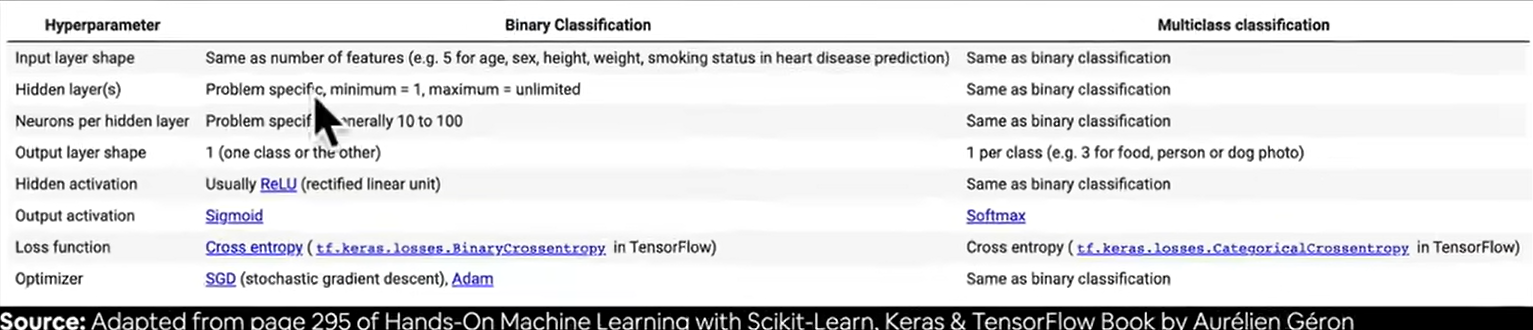

* More multilabel, you can use cross entropy, and everything else could be same. Output layers would be 1 per class or label

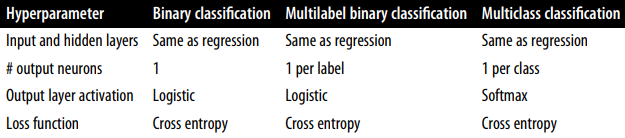



# Creating data to view and fit

In [ ]:
# Lets practice on some toy data before moving to bigger/actual problem
from sklearn.datasets import make_circles # a toy dataset for clustering and classification according to documentation

# lets make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42) # noise = 0.03 mean 3% of noisy data  


In [ ]:
# Lets check the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# labels
y[:10] # Lets just check first 10

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

As we see there is only 1 or 0, single output with only either of 2 output. It is a **Binary Classification**

Remeber visualisation is important to undersand our data. It is obviously hard to understand what it is

In [ ]:
# Lets visualize in a table form
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y}) # X0 is column 0, X1 is column 1 and label is the last
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


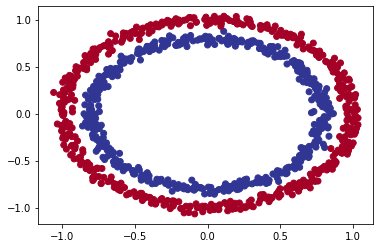

In [ ]:
# Now lets visualize as a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:,1], c = y, cmap = plt.cm.RdYlBu) # Red blue colour for our X0, X1
# first axis would have X0, second would have X1 with all data

# Input/Output shapes

In [ ]:
# Checking shapes is important first, since we might need to change the shape later on
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# Length is 1000, we can see that by our first number in shape
# Lets see just the first example to have the idea
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

Hmm, so we give 2 numbers, or 2d coordinates of (x,y) and get an output or label i.e. 0 or 1

# Steps in modelling
The steps in modeeling with TensorFlow are typically:
1. Create/import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Go to 4...

In [ ]:
# Lets create our model according to the typical model pictures above
import tensorflow as tf
tf.random.set_seed(42) # The random seed for reproducibilty

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(), # Must use brackets() or will throw type error
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"]) # Accuracy is in % ex. 0.40 means 40%
#tf.size(X)
#X = tf.constant(X, dtype = tf.float32)
#y = tf.constant([y], dtype = tf.float32)
# 3. Fit the model
model.fit(tf.cast(X, dtype = tf.float32), tf.cast(y, dtype = tf.int32), epochs = 5)

Epoch 1/5
32/32 [==============================] - 1s 1ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


So according to the above epochs (the last epoch especially) only 48% predictions are correct or iti= is just 48% correct. Meaning out of hundred it could get only 48% right

In [ ]:
# Lets train our model for longer to improve
model.fit(X, y, epochs = 200, verbose = 0)
model.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Hmm, so it just got 50% accuracy, not good. It's like it is guessing since there is only 1 or 0 (red or blue circle)

In [ ]:
# Lets try to add extra layer and try everythibg we learned to tune the hyperparameters
tf.random.set_seed(42)
# 1. Create the model with 2 layers
model = tf.keras.Sequential([
      tf.keras.layers.Dense(1),
      tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["accuracy"])

# Fit
model.fit(X, y, epochs = 100, verbose = 0)
model.evaluate(X, y) # We evaluate on test data, but for this naive example it is okay

32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

It is guessing, we can see that using** value_counts **to see how many labels we have. 

**Note:** This is a pandas feature after creating a table using pd.DataFrame

* Remember we use this same pd.DataFrame(history.history).plot()  to plot the loss curve, where history = model.fit(...)


In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

# Improving the model
Some tricks to tune the hyperparamaters to improve our model.

1. While model creating : Add more layers or increase the number of hidden units. Or changing activation function.

2. While compling : Choosing different optimization function such as Adam() insated of SGD(), and their learning rates

3. While fitting: trainging for longer, i.e. increasing epochs

In [ ]:
# Lets try tuning our model to get as high accuracy as possible
tf.random.set_seed(42)  # Random seed

# 1. Creating the model, we already tried 2 layers, lets try more than 2 now
model_improved = tf.keras.Sequential([
              tf.keras.layers.Dense(100),
              tf.keras.layers.Dense(10),
              tf.keras.layers.Dense(1)
])

# 2. Compile
model_improved.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"]) # is the standard baseline, may not be the best for a problem, we'll see later

# 3. Fitting
model_improved.fit(X, y, epochs = 100, verbose = 0)

# Evaluate
model_improved.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

Tried some things, but always shows 0.5, lets plot to visualize whats happening

# Plotting function to visualize the predictions with actual values
1. Take in trained model, features (X) and labels (y)
2. Create a meshgrid of different X values
3. Make predictions across the meshgrid
4. Plot the predictions as well as a line between the zomes (where each unique class falls)

In [ ]:
# Lets code what we said above
# Function for that
import numpy as np
import matplotlib.pyplot as plt

  # Plots the decision boundary created by a model predicting on X.
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
 x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1
 y_min, y_max = X[:, 0].min() - 0.1, X[:, 1].max() + 0.1
  # This are just the boundaries, the lowest and the highest

  # Read about numpy meshgrids to know more

 xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we are going to make predictions on these)
 x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
 y_pred = model.predict(x_in)

  # Check for multi-class
 if len(y_pred[0]) > 1:
    print("It is multiclass")
    # We will have to reshape our prediction to get them ready for plot
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape) #
 else:
    print("It is binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the boundary
 plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
 plt.scatter(X[:, 0], X[:,1], c= y, cmap = plt.cm.RdYlBu)
 plt.xlim(xx.min(), xx.max())
 plt.ylim(yy.min(), yy.max())

🔑 The above function was inspired by :
1. https://cs231n.github.io/neural-networks-case-study/
2. https://github.com/GokuMohandas/MadeWithML

It is binary


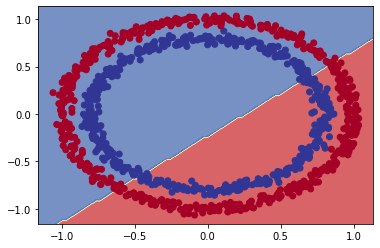

In [ ]:
plot_decision_boundary(model_improved, X, y)

Hmm..., it looks like it is drawing straight lines, i.e. regression, but our data is non linear/circular

In [ ]:
# Lets check the model we build for above works with linear data
X_lin = tf.range(0, 500, 1)
y_lin = tf.range(500, 1000, 1)
# y = x + 500
# X_lin, y_lin

#Divide training and test set 80-20%
X_train = X_lin[:400]

# Minimum ndim should be 2
# X_train.shape
X_train = tf.reshape(X_train, (400, 1)) # Total is 400 so it should be 400*1 = 400, check with above X_train.shape
y_train = tf.reshape(X_train, (400, 1)) # 1 row with 1 numbers/columns
# 400, 1 and not 1, 400 because we need to predict 1 value for 1 value, 1, 400 would mean 1 element/row with 400 features

# test set
X_test = X_lin[400 : ]
y_test = y_lin[400 : ]

# Minimun 2 dimensions
X_test = tf.reshape(X_test, (100 , 1)) # Remember 1st index is row and 2nd is column, so 1 row 1 elements/columns and 100 such i.e. 20% of 500
y_test = tf.reshape(y_test, (100, 1)) # 100, 1 and not 1, 100 because 1, 100 would mean 100 features and 1 element with those features

# X_test.shape, X_train.shape, y_test.shape, y_train.shape
y_train = y_lin[:400] # The training set of y

In [ ]:
# Lets see if we can fit this to the model we have above
# model.fit(X_lin, y_lin, epochs = 100, verbose = 0)

Oh!! seems like we cannot fit it. 
The reason being, we used BinaryCrossentropy() for losses and our y_lin has not binary data

In [ ]:
# Lets change the model so it can fit the regression data with losses = mae, because y does not have binary data
tf.random.set_seed(42)

# 1. Create the model
model_lin = tf.keras.Sequential([
          tf.keras.layers.Dense(5, activation = None),
           tf.keras.layers.Dense(5, activation = None),
          tf.keras.layers.Dense(1, activation = None)
])

# 2. Compile the model
model_lin.compile(loss = tf.keras.losses.mae, # Note we changed from BinaryCrossentropy to mae, i.e. regression compatible loss
                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
                  metrics = ["mae"])

# 3. Fitting
model_lin.fit(X_train,  y_train, epochs = 200, verbose = 0)

In [ ]:
# lets predict for X_test
y_pred = model_lin.predict(X_test)

In [ ]:
# Now lets visualize
import itertools
def visualize(X_train, X_test, y_train, y_test, y_pred ):
  plt.figure(figsize = (10,10))
  plt.plot(X_train, y_train, c = 'b')
  plt.plot(X_test, y_test, c = 'g')
  plt.plot(X_test, y_pred, c = 'r')

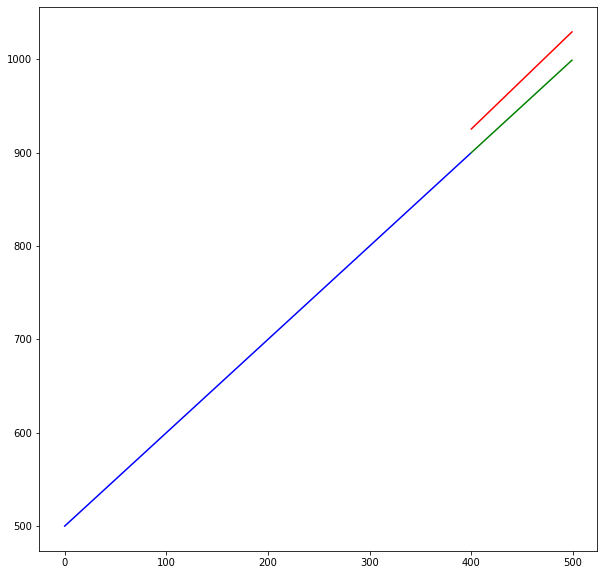

In [ ]:
visualize(X_train, X_test, y_train, y_test, y_pred)

In [ ]:
# lets evaluate the model
model_lin.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 27.8421 - mae: 27.8421


[27.842052459716797, 27.842052459716797]

That's alot, lets tune the hyperparameters of the above model, and plot again

In [ ]:
model_lin.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 27.8421 - mae: 27.8421


[27.842052459716797, 27.842052459716797]

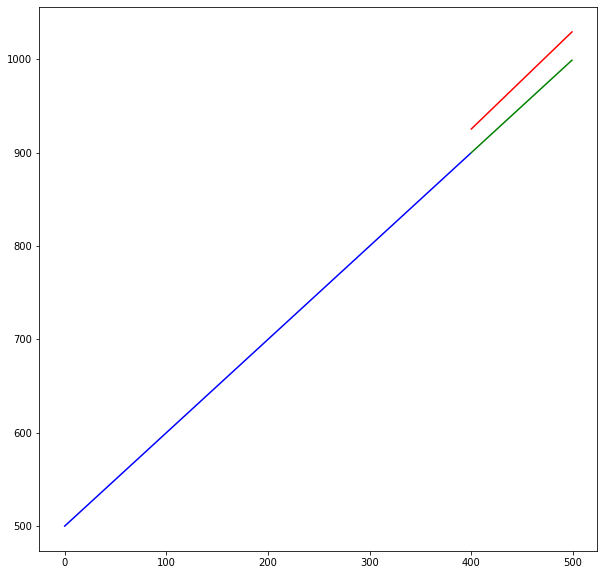

In [ ]:
visualize (X_train, X_test, y_train, y_test, y_pred)

Now it is much better, it is very smaller and insignifanct to 500. From 200 mae to this is a really good improvement

# The Non-linearity
Resource: You can use tensorflow playground to see how a model would perform before writing the code for it.

In [ ]:
# Lets create the non linear model with linear activation function
# We will use strings this time rather than writing tf.keras.something
tf.random.set_seed(42)

# 1. Creating model with sequentila API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = "linear") # tf.keras.activation.linear is same as this
])

# 2. Compiling the model
model.compile(loss = "BinaryCrossentropy", # tf.keras.losses.BinaryCrossentropy() is the same
              optimizer = "Adam", # benefit of writing this as tf.keras.optimizers.Adam() we can set alpha (learning rate)
              metrics = ["accuracy"]) 
# 3. Fitting the model
history = model.fit(X, y, epochs = 100, verbose = 0)

It is binary


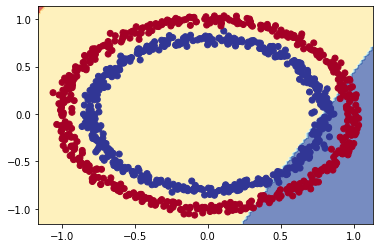

In [ ]:
plot_decision_boundary(model, X, y)

It is still worse, still plotting straight lines

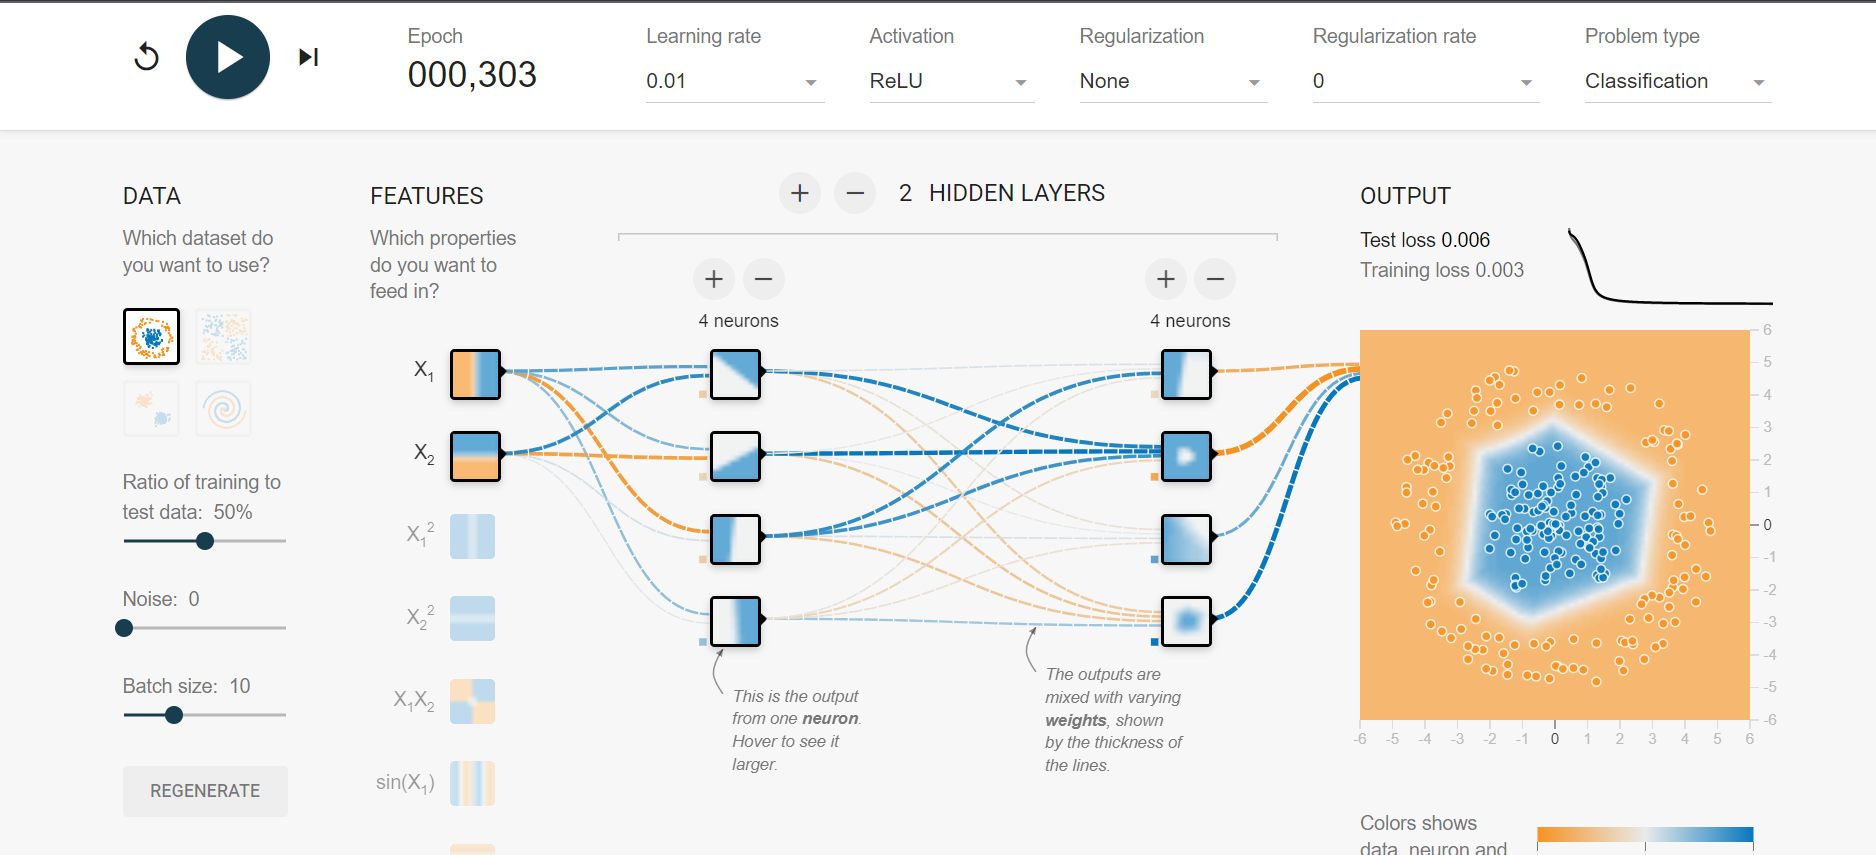

The tensorflow playground does not show the output layer

In [ ]:
# Lets replicate the above tensorflow playground model, see how efficient the loss is
# If we decrease the learning rate, it would take more epochs/longer to train for better
tf.random.set_seed(42)

# 1. Create the model
model_relu = tf.keras.Sequential([
          # It will set input neurons automatically, we just define hidden and output layers
          tf.keras.layers.Dense(4, activation = "relu"), # tf.keras.activation.relu is the same
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(1, activation = "sigmoid") # According to the picture we have above in Binary Classification we use sigmoid activation
])

# 2. Compile the model
model_relu.compile(loss = "BinaryCrossentropy",
                   optimizer = tf.keras.optimizers.Adam(lr = 0.01), # did not use "Adam" string because need to specify lr
                   metrics = ["accuracy"])
# The lr is by default 0.001, we changed it to 0.01 for it to learn faster
# 3. Fitting the model
model_relu.fit (X, y, epochs = 303)

Epoch 1/303


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/303
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/303
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/303
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/303
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/303
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/303
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/303
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/303
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/303
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/303
32/32 [=

Oh my goodness 99% accuracy

In [ ]:
# Lets evaluate
model_relu.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0164 - accuracy: 0.9940


[0.016359884291887283, 0.9940000176429749]

It is binary


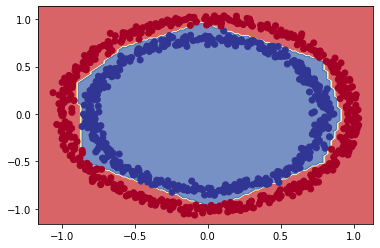

In [ ]:
# Lets visualise
plot_decision_boundary(model_relu, X, y)

See how it distunguishes between inner blue circle and red circle outside

🔑**Note:** The combination of **linear (straight lines)** and **non-linear (non-straight lines) functions** is the one of the key fundamentals of neural networks.

Using this, you can draw almost anything with combinations of these functions/lines, even through a **picture** in picture recognition

# Replicating the non-linear functions from scratch

In [ ]:
# Lets create a an example tensor to implement them on these functions (non-linear)
# Lets have them with float data type
A = tf.cast(tf.range(-25, 25), tf.float32)
A

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([-25., -24., -23., -22., -21., -20., -19., -18., -17., -16., -15.,
       -14., -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,
        -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,
         8.,   9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,  20.,  21.,  22.,  23.,  24.], dtype=float32)>

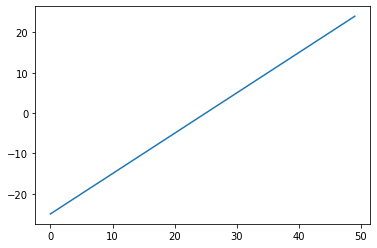

In [ ]:
plt.plot(A)

Lets first implement ReLU

**ReLU:** The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero

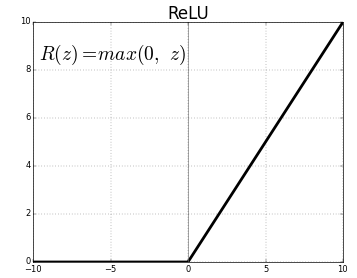

In [ ]:
# The ReLU function
def relu(A):
  return np.maximum(0, A)

In [ ]:
relu(A)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.],
      dtype=float32)

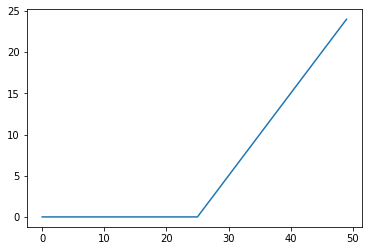

In [ ]:
# Lets plot it
plt.plot(relu(A))

Now lets implement sigmoid

**Sigmoid:** The sigmoid function, also called the sigmoidal curve (von Seggern 2007, p. 148) or logistic function, is the function

 y= $\frac{1}{(1+e^(-x))}$. 

 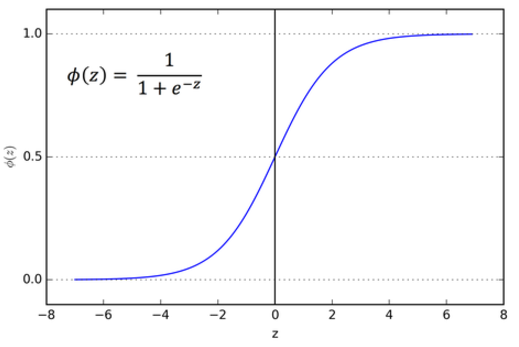

In [ ]:
# Sigmoid function
def sigmoid(A):
  return 1 / (1 + np.exp(-A))

In [ ]:
sigmoid(A)

array([1.38879446e-11, 3.77513472e-11, 1.02618795e-10, 2.78946810e-10,
       7.58256014e-10, 2.06115347e-09, 5.60279645e-09, 1.52299791e-08,
       4.13993781e-08, 1.12535155e-07, 3.05902262e-07, 8.31527984e-07,
       2.26032444e-06, 6.14417513e-06, 1.67014223e-05, 4.53978682e-05,
       1.23394580e-04, 3.35350138e-04, 9.11051175e-04, 2.47262325e-03,
       6.69285096e-03, 1.79862101e-02, 4.74258736e-02, 1.19202934e-01,
       2.68941402e-01, 5.00000000e-01, 7.31058598e-01, 8.80797029e-01,
       9.52574134e-01, 9.82013762e-01, 9.93307173e-01, 9.97527421e-01,
       9.99089003e-01, 9.99664664e-01, 9.99876618e-01, 9.99954581e-01,
       9.99983311e-01, 9.99993801e-01, 9.99997735e-01, 9.99999166e-01,
       9.99999642e-01, 9.99999881e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00], dtype=float32)

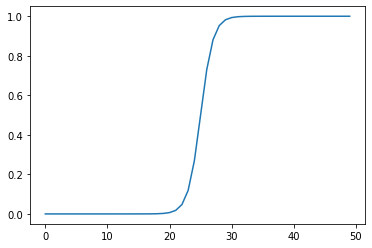

In [ ]:
# Lets plot it
plt.plot(sigmoid(A))

Now lets implement softmax from scratch

**Softmax:** Softmax is a mathematical function that converts a vector of numbers into a vector of probabilities, where the probabilities of each value are proportional to the relative scale of each value in the vector.

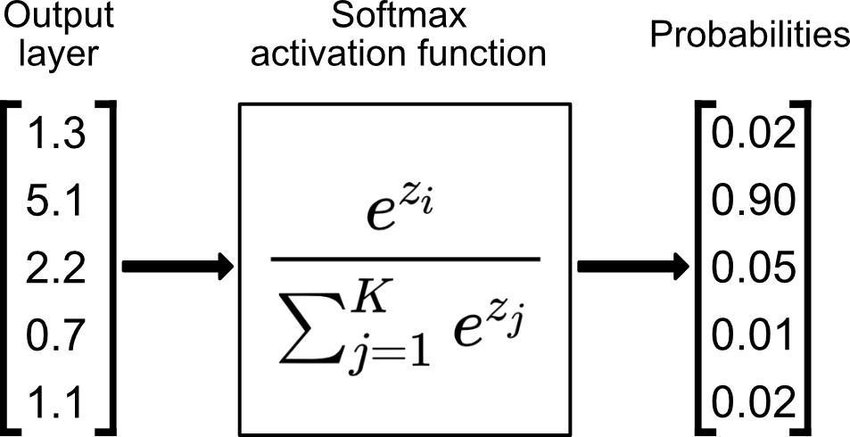

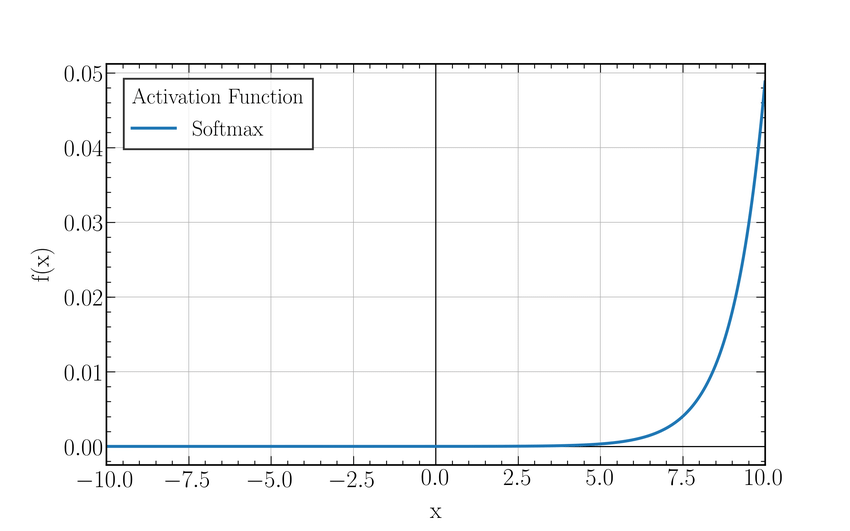

In [ ]:
# Softmax function
def softmax(A):
  return np.exp(A) / np.sum(np.exp(A))

In [ ]:
softmax(A)

array([3.3141359e-22, 9.0087552e-22, 2.4488335e-21, 6.6566201e-21,
       1.8094568e-20, 4.9186140e-20, 1.3370179e-19, 3.6343917e-19,
       9.8792993e-19, 2.6854721e-18, 7.2998706e-18, 1.9843103e-17,
       5.3939151e-17, 1.4662181e-16, 3.9855944e-16, 1.0833966e-15,
       2.9449777e-15, 8.0052796e-15, 2.1760605e-14, 5.9151455e-14,
       1.6079033e-13, 4.3707347e-13, 1.1880888e-12, 3.2295603e-12,
       8.7788544e-12, 2.3863403e-11, 6.4867459e-11, 1.7632801e-10,
       4.7930926e-10, 1.3028976e-09, 3.5416430e-09, 9.6271835e-09,
       2.6169399e-08, 7.1135801e-08, 1.9336716e-07, 5.2562643e-07,
       1.4288007e-06, 3.8838830e-06, 1.0557488e-05, 2.8698232e-05,
       7.8009871e-05, 2.1205284e-04, 5.7641929e-04, 1.5668704e-03,
       4.2591952e-03, 1.1577693e-02, 3.1471431e-02, 8.5548222e-02,
       2.3254418e-01, 6.3212055e-01], dtype=float32)

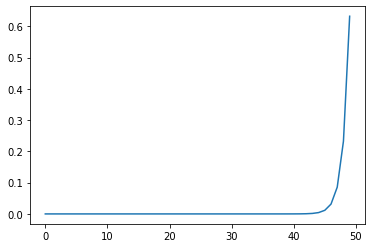

In [ ]:
# Lets plot and see
plt.plot(softmax(A))

Now lets see the last function for now, i.e. tanh

**Tanh:** The larger the input (more positive), the closer the output value will be to 1.0, whereas the smaller the input (more negative), the closer the output will be to -1.0. The Tanh activation function is calculated as follows: 

$\frac{(e^x – e^-x)}{(e^x + e^-x)}$

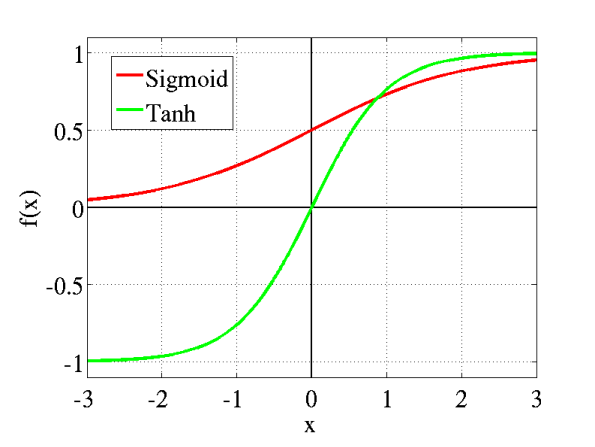

In [ ]:
# tanh function from scratch
def tanh(A):
  return (np.exp(A) - np.exp(-A)) / (np.exp(A) + np.exp(-A))

In [ ]:
tanh(A)

array([-1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -1.        , -1.        , -1.        ,
       -1.        , -1.        , -0.9999998 , -0.99999845, -0.9999877 ,
       -0.9999091 , -0.9993293 , -0.9950547 , -0.9640275 , -0.7615942 ,
        0.        ,  0.7615942 ,  0.9640275 ,  0.9950547 ,  0.9993293 ,
        0.9999091 ,  0.9999877 ,  0.99999845,  0.9999998 ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
      dtype=float32)

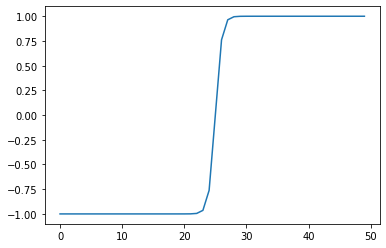

In [ ]:
# Lets plot and confirm
plt.plot(tanh(A))

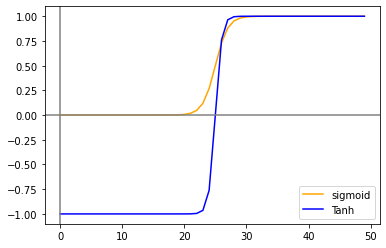

In [ ]:
# Now lets replicate the above image to see the difference between sigmoid and tanh
plt.plot(sigmoid(A), c = "orange", label = "sigmoid")
plt.plot(tanh(A), c = "blue", label = "Tanh")
plt.axvline(x = 0, c = "grey")
plt.axhline(y = 0, c= "grey")
plt.legend()

# Evaluating and improving our classification model
So far we have train and test on the same data. Now lets use our concept of dividing training and test datasets

In [ ]:
# Lets check number of examples to divide
len(X), len(y)

(1000, 1000)

In [ ]:
# We can split either by indexing or using Sklearn, but I will use Sklearn here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

''' random_state : Controls the shuffling applied to the data before applying the split. 
Pass an int for reproducible output across multiple function calls.
And 0.2 is just 20% test set'''

len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [ ]:
# Lets check our efficient models layers and neurons to recreate it
model_relu.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 4)                 12        
                                                                 
 dense_11 (Dense)            (None, 4)                 20        
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Now lets recreate our efficient model to fit on train set and predict on test
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
      tf.keras.layers.Dense(4, activation = "relu"),
      tf.keras.layers.Dense(4, activation = "relu"),
      tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics = ["accuracy"])

# 3. Fitting the model
history = model.fit(X_train, y_train, epochs = 303, verbose = 0)

In [ ]:
# Lets evaluate it on our test set
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9950


[0.0174434632062912, 0.9950000047683716]

# What history.history gives
It would return metrics and loss for each epoch

In [ ]:
history.history 

{'accuracy': [0.5637500286102295,
  0.5649999976158142,
  0.5762500166893005,
  0.5724999904632568,
  0.5712500214576721,
  0.59375,
  0.6274999976158142,
  0.6962500214576721,
  0.7212499976158142,
  0.7674999833106995,
  0.8025000095367432,
  0.8687499761581421,
  0.8974999785423279,
  0.9162499904632568,
  0.9412500262260437,
  0.9674999713897705,
  0.9587500095367432,
  0.9762499928474426,
  0.9737499952316284,
  0.9750000238418579,
  0.9574999809265137,
  0.9775000214576721,
  0.9775000214576721,
  0.9850000143051147,
  0.9637500047683716,
  0.987500011920929,
  0.987500011920929,
  0.987500011920929,
  0.9925000071525574,
  0.9925000071525574,
  0.9887499809265137,
  0.9962499737739563,
  0.9937499761581421,
  0.9937499761581421,
  0.9950000047683716,
  0.9925000071525574,
  0.9912499785423279,
  0.9912499785423279,
  0.9962499737739563,
  0.9950000047683716,
  0.9962499737739563,
  0.9975000023841858,
  0.9912499785423279,
  0.9937499761581421,
  0.9962499737739563,
  0.99250000

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
...,...,...
298,0.009585,0.99625
299,0.014559,0.99500
300,0.010708,0.99750
301,0.011347,0.99750


Text(0, 0.5, 'loss')

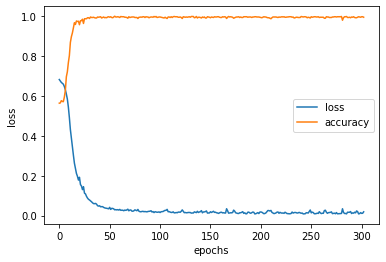

In [ ]:
# Lets plot the loss curve with the above pandas dataframe
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")

It is binary
It is binary


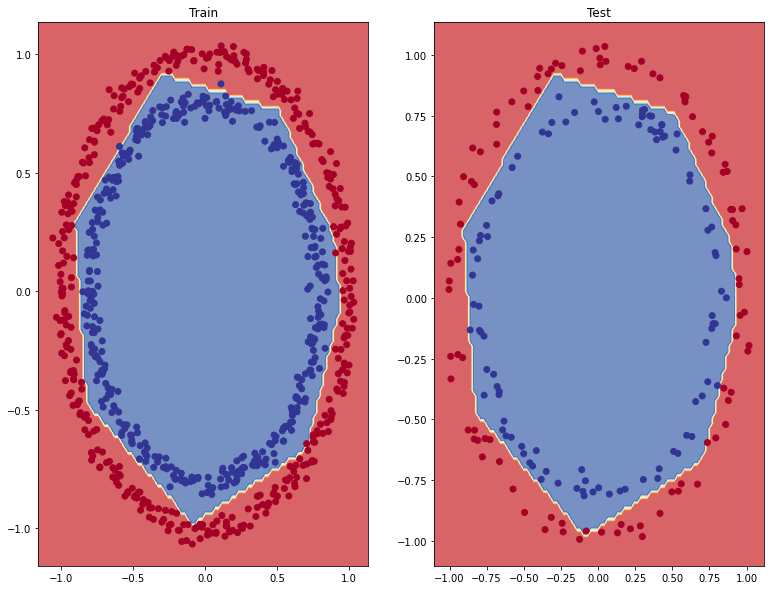

In [ ]:
# Now lets plot the decision boundaries for the training and test sets
plt.figure(figsize = (13, 10))
plt.subplot(1, 2, 1) # 1 row 2 columns and 1st value is the train
plt.title("Train")
plot_decision_boundary(model, X_train, y_train) # Our plot boundary function

plt.subplot(1, 2, 2) # 1 row 2 column, and the 2nd value
plt.title("Test")
plot_decision_boundary(model, X_test, y_test)

# Finding the best learning rate
To find the ideal learning rate, the rate where the loss is the minimum, we will use the following:
1. A learning rate **callback:** Can be considered as an extra piece of functionality we can to a model *while it is in training*
2. A model
3. Modified loss curve plot.

In [ ]:
# This model is the same as the above, but for practice I am building it again
tf.random.set_seed(42)

# 1. Create the model
model_lr = tf.keras.Sequential([
      tf.keras.layers.Dense(4, activation = "relu"),
      tf.keras.layers.Dense(4, activation = "relu"),
      tf.keras.layers.Dense(1, activation = "sigmoid")
])

# 2. Compiling the model
model_lr.compile(loss = "BinaryCrossentropy",
              optimizer = "Adam",
              metrics = ["accuracy"])

''' Now here is the difference, our learning rate callback should exist before training,
that is before using Fit, so lets create that'''

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

'''Essentially what the above line is saying inside ( lambda.....),
traverse the value of learning rate from 10^-4 and increase it with 10^epoch/20 (** means power),
every epoch '''

# 3. Fitting the model
history = model_lr.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler], verbose = 0)

''' We pass the callback inside the fitting function.
Also, it is passed as a list, and one can pass multiple callbacks'''

' We pass the callback inside the fitting function.\nAlso, it is passed as a list, and one can pass multiple callbacks'

Text(0.5, 0, 'epochs')

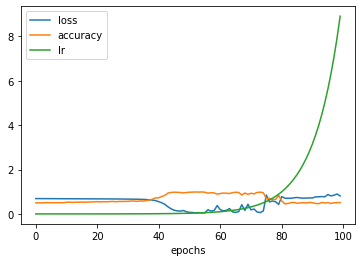

In [ ]:
# Lets plot and see, by using it as pandas DataFrame
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")

In [ ]:
# lets only plot between learning rate vs loss
lr = 1e-4 * (10 ** (tf.range(100)/20)) # these would be our range of lrs in callbacks
lr

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

In [ ]:
len(lr)

100

We had 100 epochs and 100 learning rates, that perfect, these are our different learning rates that our model tried out

Text(0, 0.5, 'loss')

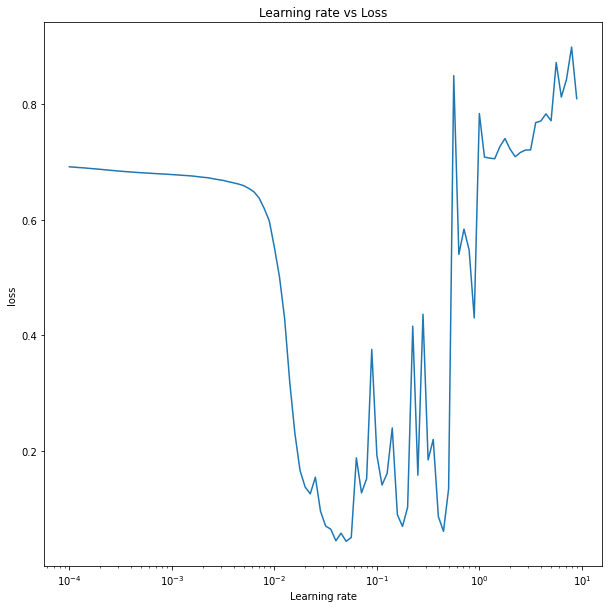

In [ ]:
# Now lets plot
plt.figure(figsize = (10,10))
plt.semilogx(lr, history.history["loss"]) # Semilogx will put log scaling on x axis
# history["loss"] will give us only loss from history
plt.title("Learning rate vs Loss")
plt.xlabel("Learning rate")
plt.ylabel("loss")

🔑 **Note:** Usually the learning rate is 10 times lower then the one where we get the lowest loss. For example in above example, it is lowest in between $10^-1$ and $10^-2$. Our model in above example worked best with 99.5% accuracy at 0.01. It was lucky guess for us 

Generally default learning rates are good, but if they do not, then you try to increase or decrese by 10 times
that is either 1, 0.1, 0.01 or the default 0.001. The learning rate could be arbitarily anything. But, it does not matter, we use 10's multiples.
* But you can arbitrarily try and find performance on different learning rates

# Classification Evaluation methods
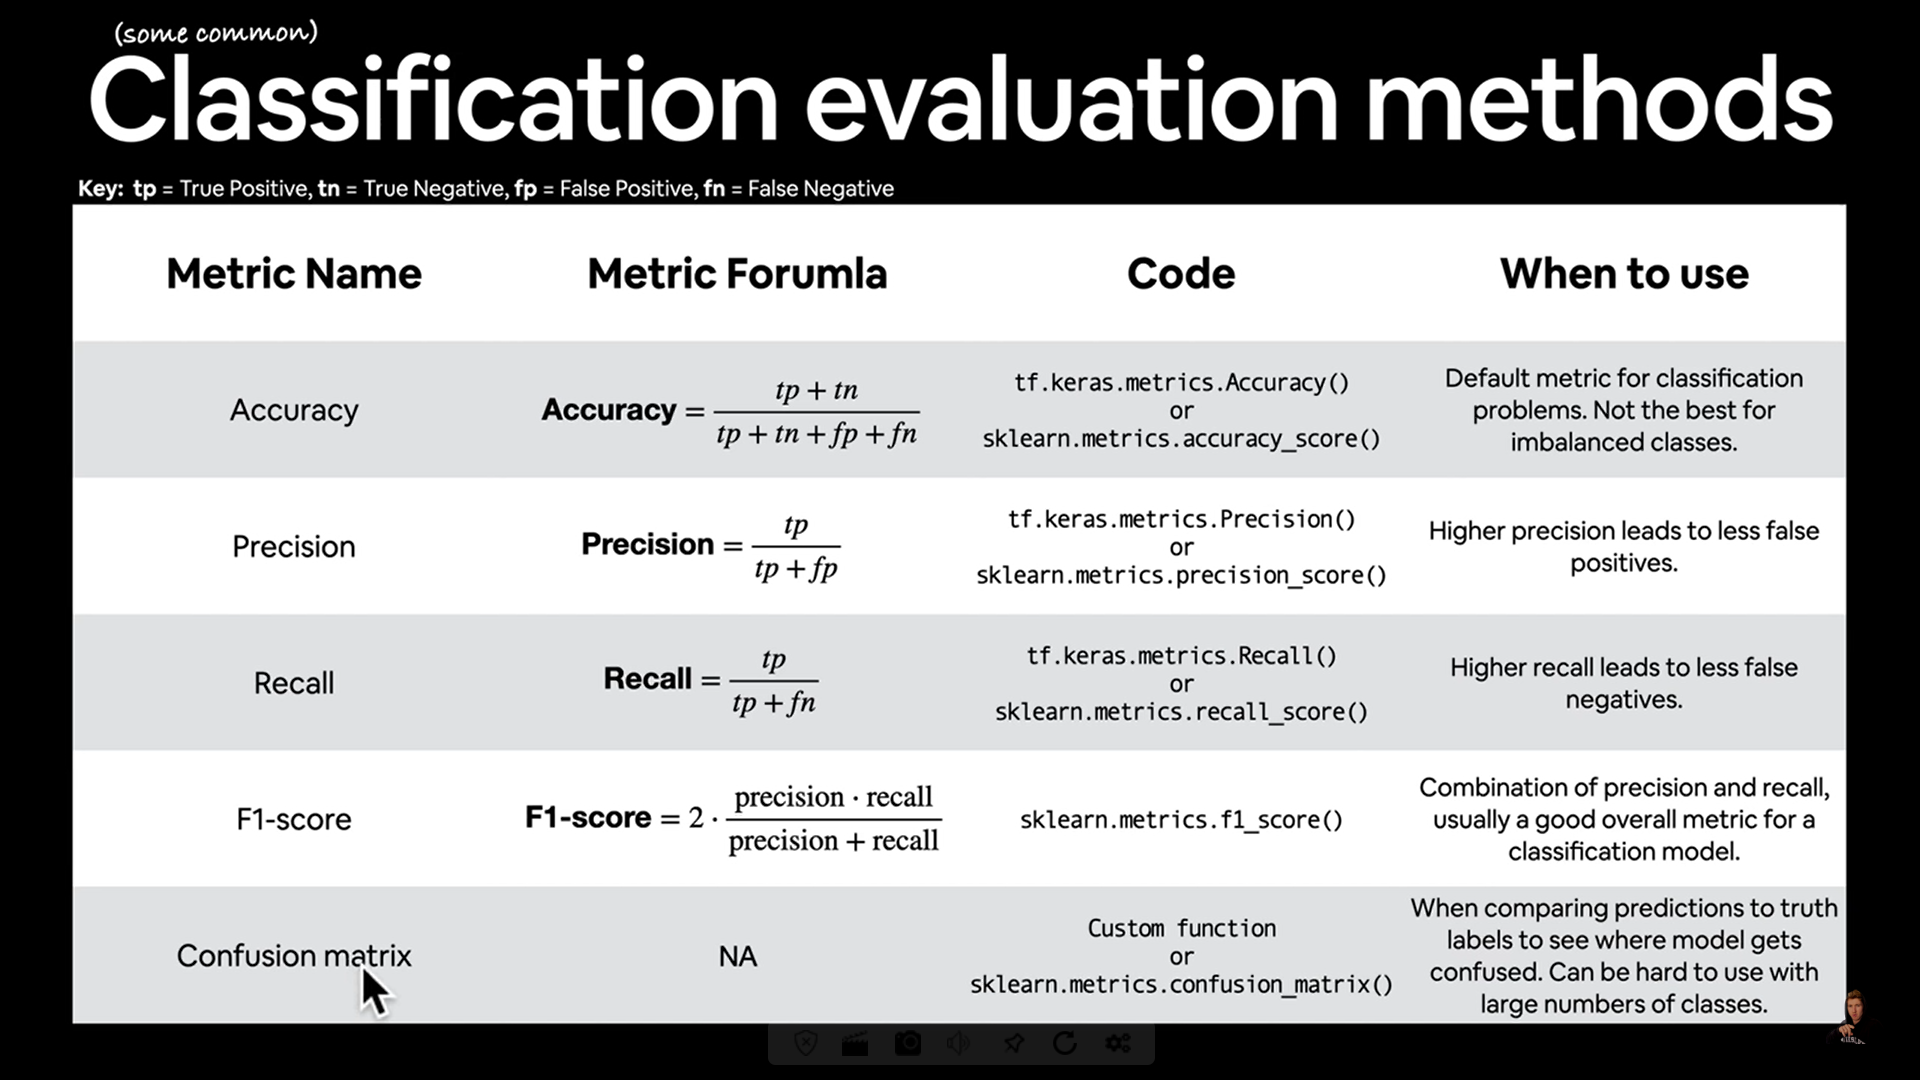

We'll also cover the following along side the above.
* Classification report (from scikit-learn)

In [ ]:
# Lets check the accuracy of our best model with 99.5% accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss on the test set: {loss}")
print(f"Accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.9950
Loss on the test set: 0.0174434632062912
Accuracy on the test set: 99.50%


# Confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. The confusion matrix itself is relatively simple to understand, but the related terminology can be confusing.

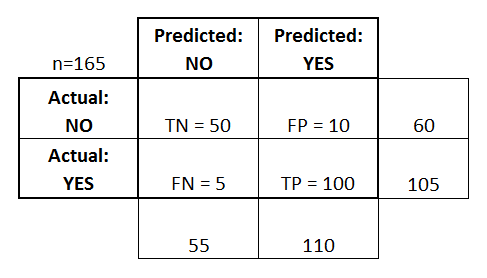

* TP : True Positive
* FP : False Positive
* TN : True Negative
* FN : False Negative



In [ ]:
# From the picture of Evaluation Metrices, lets use confusion matrix from Sklearn
from sklearn.metrics import confusion_matrix

# Predictions
y_pred = model.predict(X_test)

# Confusion matrix
'''
confusion_matrix(y_test, y_pred) '''

# The above code would  give error
''' ValueError: Classification metrics can't handle a mix of binary and continuous targets '''

" ValueError: Classification metrics can't handle a mix of binary and continuous targets "

In [ ]:
# Lets check what our predictions actually are compared to y_test (for 10 elements)
y_pred[:10], y_test[:10]

(array([[9.9999940e-01],
        [2.9869476e-05],
        [9.9999964e-01],
        [4.7560930e-03],
        [9.8499191e-01],
        [9.9999297e-01],
        [1.1108791e-12],
        [4.2853684e-10],
        [9.9998009e-01],
        [5.3955441e-06]], dtype=float32),
 array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0]))

Oh! The predictions are in "**Prediction Probability**" form i.e. the standard output from the sigmoid (or softmax) activation functions

In [ ]:
# You can confirm the above by just writing the value down for example
9.999e-01

0.9999

In [ ]:
# We would need to round these to nearest values, for example less than 0.5 -> 0 and 1 otherwise
# Lets convert these prediction probablities to binary format and view the first 10
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Now our confusion matrix should work
confusion_matrix(y_test, tf.round(y_pred))

array([[ 99,   1],
       [  0, 100]])

🔑**Note:** Here is why it did not work without rounding the values of prediction probability:

If we see the picture of the confusion matrix, and understand the definition, it just compares the values of test and prediction to see and find 
1. TP
2. TN
3. FP
4. FN

Now, if values in both tensors are not same, it is not possible for it to find the results

# Using Sklearn's plot confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

* Sklearn calls it's model estimator

In [ ]:
import itertools

def plot_matrix (y_test, y_pred):

    # Creating the confusion matrix
    confusion_m = confusion_matrix(y_test, tf.round(y_pred))
    confusion_matrix_norm = confusion_m.astype("float") / confusion_m.sum(axis = 1)[:, np.newaxis]
    ''' The above line will normalize the matrix ''' 
    n_classes = confusion_m.shape[0] # To see number of classes (rows)

    # Prettifying it
    fig, ax = plt.subplots(figsize = (10, 10))

    # Matrix plot
    cax = ax.matshow(confusion_m, cmap = plt.cm.Blues) 
    fig.colorbar(cax)

    # Classes
    if confusion_m.shape[0] > 2:
      classes = True
    else :
      classes = False

    if classes:
      labels = classes # If we have multiclass then it would save the list to labels
    else:
      labels = np.arange(confusion_m.shape[0]) # else just the array of our binary label

    # Axes labels
    ax.set(title = "Confusion Matrix",
           xlabel = "Predicted label",
           ylabel = "True Label",
           xticks = np.arange(n_classes),
           yticks = np.arange(n_classes),
           xticklabels = labels,
           yticklabels = labels)

    # Thresold for different colors
    thresold = (confusion_m.max() + confusion_m.min()) / 2 # Average

    # Plot the text on each cell
    for i, j in itertools.product(range(confusion_m.shape[0]), range(confusion_m.shape[1])):
           ''' The above is just saying that put the rows as X and Columns as Y'''
           plt.text(j, i, f"{confusion_m[i, j]}({confusion_matrix_norm[i,j]*100: .1f}%)",
                        horizontalalignment = "center",
                        color = "white" if confusion_m[i,j] > thresold else "black",
                        size = 15)     

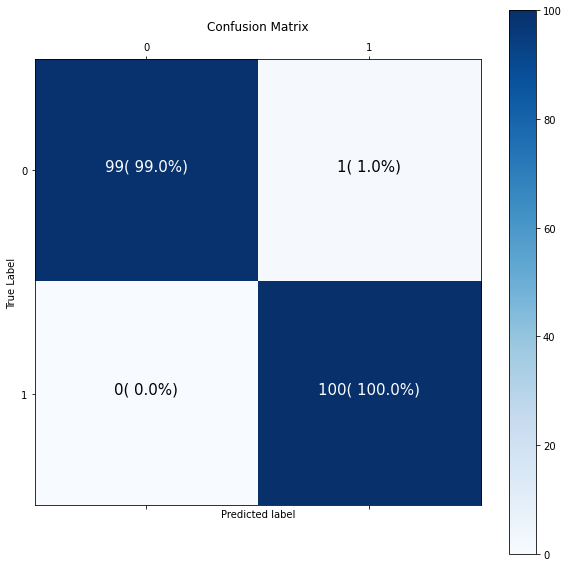

In [ ]:
plot_matrix (y_test, y_pred)

# Multi-class Classification
* When more than two classes are optin, it is known as **Multi-class classification**
* More than two means, it could be arbitararily big

To practice multi-class classification, we will build a neural network to classify images of different items of clothing.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# We are importing from keras.datasets so already sorted into training and test sets
# Like we did earlier or refer to the documentation
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# Lets see our first training and test set data
print(f"X_train:\n {X_train[0]}\n")
print(f"y_train:\n {y_train[0]}\n")

X_train:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 

In [3]:
# Lets check the shape of a single example
X_train[0].shape, y_train[0].shape

((28, 28), ())

28 x 28 dimension picture

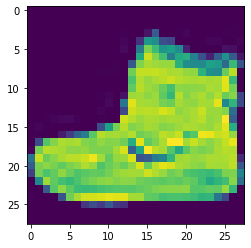

In [4]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(X_train[0]) # imshow -> image show

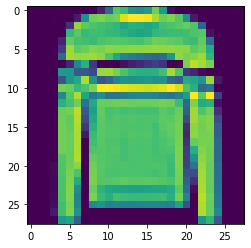

In [5]:
# Lets check one more
plt.imshow(X_train[5])

In [6]:
# Lets see the labels for the above 2
y_train[0], y_train[5]

(9, 2)

In [7]:
# We need this labels to be human readable i.e string
# Lets create a small lisr so  we can index our labels on them
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt",
              "Sneaker", "Bag", "Ankle boot"]

Text(0.5, 1.0, 'Pullover')

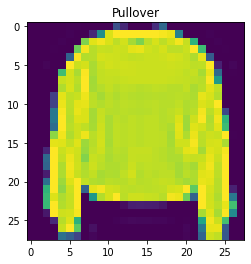

In [8]:
# Lets plot with the label this time
plt.imshow(X_train[7]) # For black and white image use , cmap = plt.cm.Binary  
plt.title(class_name[y_train[7]])

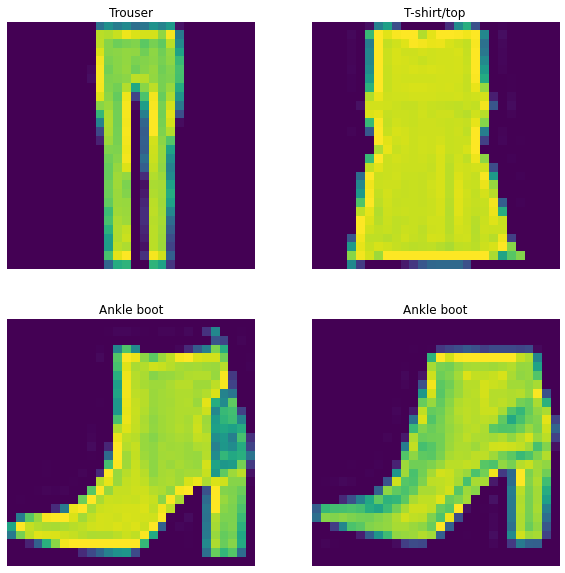

In [9]:
# Plot multiple random images from our above fashion MNIST
import random
plt.figure(figsize = (10,10))
for i in range(4):
  ax = plt.subplot(2, 2, i+1) # multiple plot so subplot with 2 rows 2 columns
  rand = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand])
  plt.title(class_name[y_train[rand]])
  plt.axis(False) # No axis

# Building a multi-class classification model
For our multi-class model, we use a similar architecture to our binary classification, however we a few chnages:
* Input shape : 28 * 28
* Output shape: 10 (one per class of clothing) in our this case
* Loss function : CategoricalCross entropy()
* Output layer activation : Softmax

In [10]:
# Lets build the model
tf.random.set_seed(42)

# 1. Create the model
model_multiclass = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape = (28, 28)), 
                tf.keras.layers.Dense(4, activation = "relu"),
                tf.keras.layers.Dense(4, activation = "relu"),
                tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile
model_multiclass.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),                  
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["accuracy"])

# 3. Fitting the model
non_norm_history = model_multiclass.fit(X_train, y_train, epochs = 10,
                                        validation_data = (X_test, y_test))
# Validation_data is just the data it validates the train data on i.e. test data, it would give,
# val_accuracy and val_loss in output which corresponds to this data

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accur

**Key take aways from above:** 

* tf.keras.Flatten our input data into a single long columnn with shape,
(None, 784) (28*28 = 784)
*  To use CategoricalCrossentropy we need one hot encoded labels, but if we want
to just use the integer values without one-hot encoding we can use **SparsecategoricalCrossentropy()**

In [11]:
# Now lets try one hot encoded labels with CategoricalCrossEntropy()
# 1. Create the model
model_categorical = tf.keras.Sequential([
                 tf.keras.layers.Flatten(input_shape = (28, 28)),
                 tf.keras.layers.Dense(4, activation = "relu"),
                 tf.keras.layers.Dense(4, activation = "relu"),
                 tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile
model_categorical.compile(loss = "CategoricalCrossentropy",
                          optimizer = "Adam",
                          metrics = ["accuracy"])

# 3. Fiiting
model_categorical.fit(X_train, tf.one_hot(y_train, depth = 10), epochs = 10,
                      validation_data = (X_test, tf.one_hot(y_test, depth = 10)))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.4122 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [12]:
# Lets improve the performance, but first since our data is between 0 and 25
# Lets just verify
X_train.min(), X_train.max()

(0, 255)

Neural networks likes the scaled (normalized) data i.e. numbers between 0 and 1

In [13]:
# The obvious way to convert our train and test data in between 0 and 1 is dividing by max
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

# Verify it
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [14]:
# Now lets build the model to fit on this normalized data
tf.random.set_seed(42)

# 1. Create the model
model_norm = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(4, activation = "relu"),
          tf.keras.layers.Dense(10, activation = "softmax")
])

# 2. Compile the model
model_norm.compile(loss = "SparseCategoricalCrossentropy",
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

# 3. Fit the model
norm_history = model_norm.fit(X_train_scaled, y_train, epochs = 10, validation_data = (X_test_scaled, y_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

🔑**Note:** Neural networks prefer data in numerical form as well as scaled/normalized form i.e. between 0 and 1

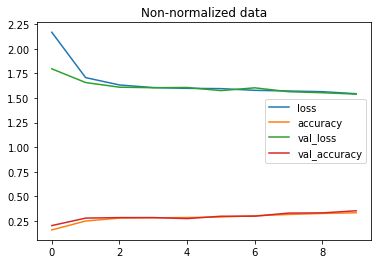

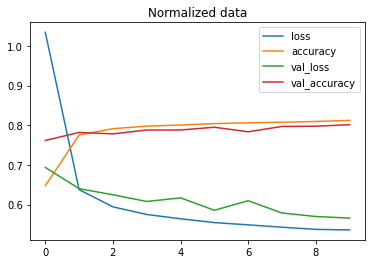

In [20]:
# Lets plot the loss curve for both the normalised and non-normlised models
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title = "Non-normalized data")
pd.DataFrame(norm_history.history).plot(title = "Normalized data")